<a href="https://colab.research.google.com/github/matthew-ferreira/FrequentistML/blob/main/Ferreira_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0]	eval-rmse:10.2539
Will train until eval-rmse hasn't improved in 1 rounds.
[1]	eval-rmse:7.80454
[2]	eval-rmse:6.15991
[3]	eval-rmse:5.36032
[4]	eval-rmse:4.84535
[5]	eval-rmse:4.74033
[6]	eval-rmse:4.73294
[7]	eval-rmse:4.75722
Stopping. Best iteration:
[6]	eval-rmse:4.73294

12.285457903756408


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

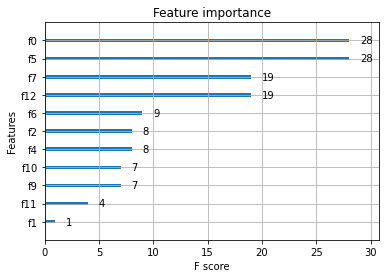

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

X, y = load_boston(return_X_y=True)
boston = load_boston()
X_test      =   X[506-51:]
X_validate  =   X[506-102:506-51]
X_train     =   X[:404]

y_test      =   y[506-51:]
y_validate  =   y[506-102:506-51]
y_train     =   y[:404]

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_validate, y_validate)
evallist = [(dval, 'eval')]

bst = xgb.train([], dtrain, 10, evallist, early_stopping_rounds=1)

dtest = xgb.DMatrix(X_test)
y_hat_test = bst.predict(dtest)

print(mean_squared_error(y_test, y_hat_test))
xgb.plot_importance(bst)

boston.feature_names
